<a href="https://colab.research.google.com/github/kovacova/random-magic/blob/master/StyleGAN%202%20-%20Anime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%cd /content
!pip install typeguard;
!pip install psutil
!pip install humanize
!rm -rf stylegan && git clone https://github.com/lucidrains/stylegan.git;
%cd /content/stylegan

from IPython.display import Image
from google.colab import files
import sys
import pickle
import numpy as np
import PIL
import psutil
import humanize
import os
import time

def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))


/content
Cloning into 'stylegan'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 63 (delta 21), reused 58 (delta 16), pack-reused 0
Unpacking objects: 100% (63/63), done.
/content/stylegan


In [0]:
sys.path.append('/content/stylegan/dnnlib')
import dnnlib
import dnnlib.tflib as tflib
dnnlib.tflib.init_tf()

In [0]:
entity_to_url = {
  'faces': 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ',
  'celebs': 'https://drive.google.com/uc?id=1MGqJl28pN4t7SAtSrPdSRJSQJqahkzUf',
  'bedrooms': 'https://drive.google.com/uc?id=1MOSKeGF0FJcivpBI7s63V9YHloUTORiF',
  'cars': 'https://drive.google.com/uc?id=1MJ6iCfNtMIRicihwRorsM3b7mmtmK9c3',
  'cats': 'https://drive.google.com/uc?id=1MQywl0FNt6lHu8E_EUqnRbviagS7fbiJ',
  'anime': 'https://drive.google.com/uc?id=1z8N_-xZW9AU45rHYGj1_tDHkIkbnMW-R'
}

In [0]:
model_cache = {}

In [0]:
def fetch_model(name):
  if model_cache.get(name):
    return model_cache[name]

  url = entity_to_url[name]

  with dnnlib.util.open_url(url, cache_dir='cache') as f:
    _G, _D, Gs = pickle.load(f)
    model_cache[name] = Gs
  return model_cache[name]

In [0]:
synthesis_kwargs = dict(output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True), minibatch_size=20)

took 0.6246790885925293 seconds 0.6246790885925293


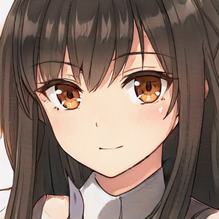

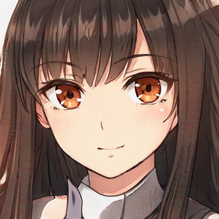

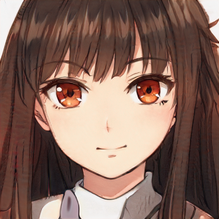

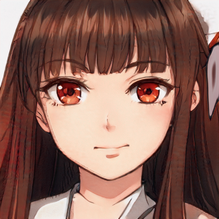

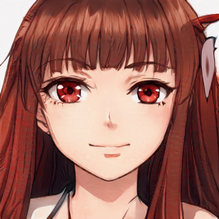

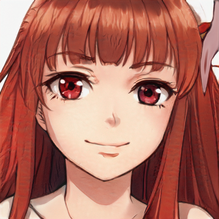

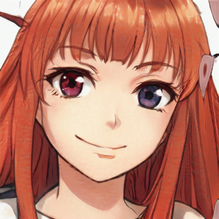

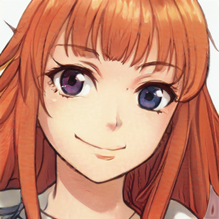

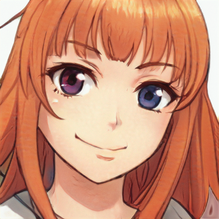

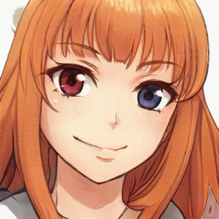

Gen RAM Free: 12.1 GB  | Proc size: 2.0 GB


In [0]:
#@title Image generation settings
#@markdown Set different seed for different images
text_and_dropdown = 'anime' #@param ["faces", "celebs", "cats", "cars", "bedrooms", "anime"]
seed = 1884921 #@param {type:"slider", min: 0, max: 10000000, step: 1}
interpolate_dim = 418 #@param {type:"slider", min:0, max:511, step:1}
image_dim = 219 #@param {type:"slider", min:100, max:1000, step:1}

Gs = fetch_model(text_and_dropdown)

# generate images code interpolated across one of the 512 dimensions
init_latent = np.random.RandomState(seed).randn(1, Gs.input_shape[1])[0]

def apply_latent_fudge(fudge):
  copy = np.copy(init_latent)
  copy[interpolate_dim] += fudge
  return copy
  
interpolate = np.linspace(0., 30., 10) - 15
latents = np.array(list(map(apply_latent_fudge, interpolate)))

start = time.time()
images = Gs.run(latents, None, **synthesis_kwargs)
diff = time.time() - start
print(f"took {diff} seconds", diff)

for ind in range(len(interpolate)):
  img = PIL.Image.fromarray(images[ind], 'RGB')
  img = img.resize((image_dim, image_dim), PIL.Image.ANTIALIAS)
  display(img)

printm()